In [1]:
!pip install selenium
!pip install selenium_stealth
!pip install bs4

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium_stealth import stealth
from bs4 import BeautifulSoup
import time
import csv

# Path to the correct Chrome binary
chrome_binary_path = r'C:/Program Files/Google/Chrome/Application/chrome.exe'

# Set Chrome options
options = webdriver.ChromeOptions()
options.binary_location = chrome_binary_path
options.add_argument('--headless')  # Optional, for headless browsing
options.add_argument("--disable-blink-features=AutomationControlled")  # Prevents detection of automation

# Path to ChromeDriver (update this path)
chrome_driver_path = r'D:\College Notes\5th Sem\DS304 Visualization & App Development 4\Lab_5\chromedriver-win64\chromedriver.exe'

# Set up the service with ChromeDriver
chrome_service = Service(chrome_driver_path)

# Start ChromeDriver with options
driver = webdriver.Chrome(service=chrome_service, options=options)

# Selenium stealth settings to avoid detection
stealth(driver,
        languages=["en-US", "en"],
        vendor="Google Inc.",
        platform="Win32",
        webgl_vendor="Intel Inc.",
        renderer="Intel Iris OpenGL Engine",
        fix_hairline=True,
        )

# Navigate to the Bloomberg Billionaire Index
url = 'https://www.bloomberg.com/billionaires/'
driver.get(url)

# Wait for the page to load
time.sleep(10)  # Increase wait time to ensure the page is fully loaded

# Get the HTML content of the page
html_content = driver.page_source

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Define lists to store the extracted data
billionaire_data = []

# Locate billionaire rows and extract required information
billionaire_rows = soup.find_all('div', class_='table-row')  # Adjust this class as necessary

# Loop through each row and extract relevant data
for row in billionaire_rows:
    rank = row.find('div', class_='t-rank').text.strip()  # Extract rank
    name = row.find('div', class_='t-name').text.strip()  # Extract name
    net_worth = row.find('div', class_='t-nw').text.strip()  # Extract net worth
    last_change = row.find('div', class_='t-lcd').text.strip()  # Extract last change
    ytd_change = row.find('div', class_='t-ycd').text.strip()  # Extract YTD change
    country = row.find('div', class_='t-country').text.strip()  # Extract country/region
    industry = row.find('div', class_='t-industry').text.strip()  # Extract industry

    # Append extracted data to the list
    billionaire_data.append([rank, name, net_worth, last_change, ytd_change, country, industry])

# Write data to a CSV file
csv_file = 'billionaire_data.csv'
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header row
    writer.writerow(['Rank', 'Name', 'Total Net Worth', 'Last Change', 'YTD Change', 'Country/Region', 'Industry'])
    # Write the data rows
    writer.writerows(billionaire_data)

print(f'Data successfully written to {csv_file}')

# Close the driver
driver.quit()

Data successfully written to billionaire_data.csv


## Summary Statistics

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('billionaire_data.csv')

# Clean the 'Total Net Worth' column (remove '$' and 'B')
df['Total Net Worth'] = df['Total Net Worth'].replace({'\$': '', 'B': ''}, regex=True).astype(float)

# Summary statistics
summary_stats = df['Total Net Worth'].describe()
summary_stats


count    495.000000
mean      19.216848
std       28.173463
min        6.360000
25%        7.780000
50%       10.600000
75%       16.900000
max      241.000000
Name: Total Net Worth, dtype: float64

## Top Indian Billionaires

C:\Users\udits\AppData\Local\Temp\ipykernel_3392\4221298204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Net Worth', y='Name', data=top_indian_billionaires, palette='viridis')


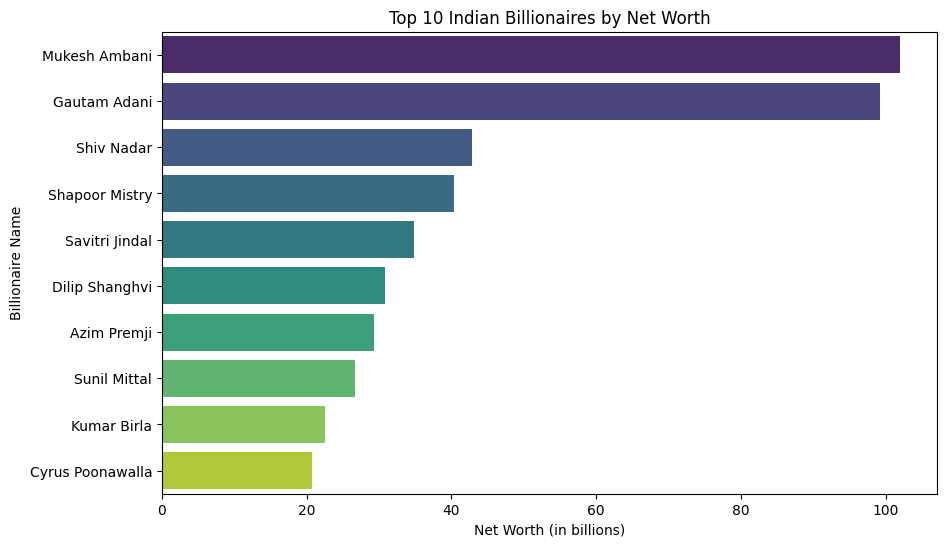

In [8]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Net Worth', y='Name', data=top_indian_billionaires, palette='viridis')  
plt.title('Top 10 Indian Billionaires by Net Worth')
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Billionaire Name')
plt.show()


## Country Representation

C:\Users\udits\AppData\Local\Temp\ipykernel_3392\2064097485.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_countries.values, y=top_5_countries.index, palette='plasma')


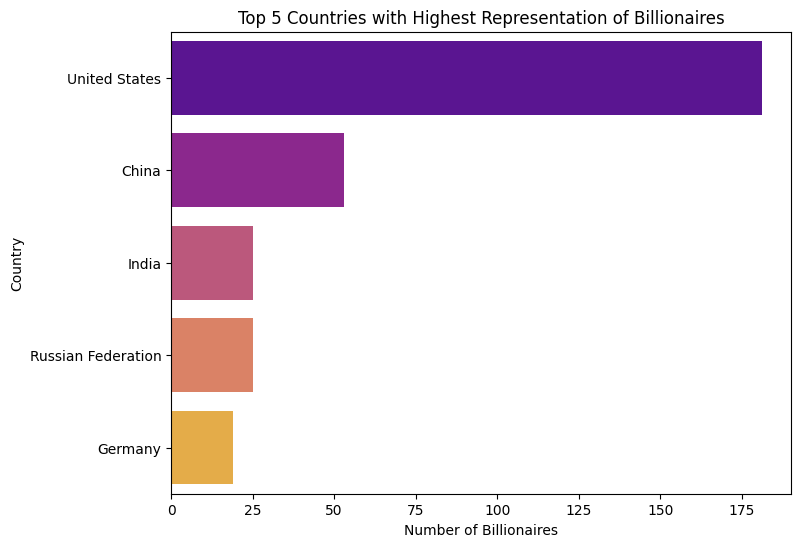

'United States'

In [10]:
# Count the number of billionaires per country
country_counts = df['Country/Region'].value_counts()

# Get the top 5 countries
top_5_countries = country_counts.head(5)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_countries.values, y=top_5_countries.index, palette='plasma') 
plt.title('Top 5 Countries with Highest Representation of Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Country')
plt.show()

# Identify the country with the highest representation
top_country = top_5_countries.idxmax()
top_country

## Industry Representation

C:\Users\udits\AppData\Local\Temp\ipykernel_3392\926551781.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_industries.values, y=top_5_industries.index, palette='magma')


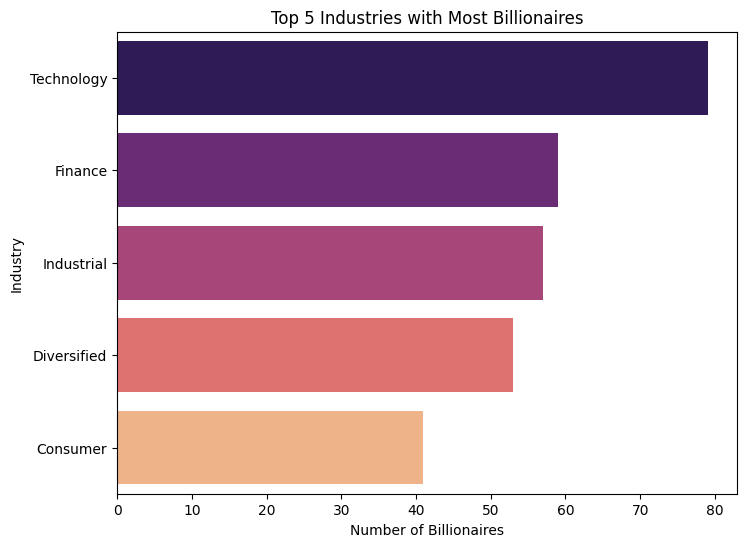

In [12]:
# Count the number of billionaires in each industry
industry_counts = df['Industry'].value_counts()

# Get the top 5 industries
top_5_industries = industry_counts.head(5)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_industries.values, y=top_5_industries.index, palette='magma')  
plt.title('Top 5 Industries with Most Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Industry')
plt.show()

## Continent Mapping

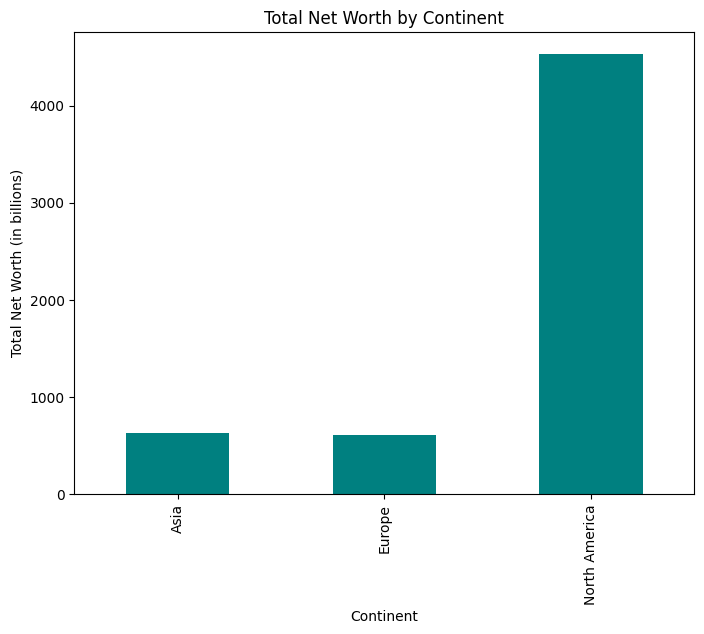

In [13]:
# Define a mapping of countries to continents (add more countries as needed)
continent_map = {
    'United States': 'North America',
    'India': 'Asia',
    'France': 'Europe',
    'Spain': 'Europe',
    # Add more mappings
}

# Create the 'Continent' column
df['Continent'] = df['Country/Region'].map(continent_map)

# Group by continent and calculate the total net worth
continent_net_worth = df.groupby('Continent')['Total Net Worth'].sum()

# Plotting
plt.figure(figsize=(8, 6))
continent_net_worth.plot(kind='bar', color='teal') 
plt.title('Total Net Worth by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Net Worth (in billions)')
plt.show()
